# Faktor Apakah yang Menjual Sebuah Mobil?

# Konten <a id='back'></a>

* [Pendahuluan](#intro)
    * [1.1 Tujuan](#tujuan)
    * [1.2 Tahapan](#tahap)
* [Tahap 1: Pra-pemrosesan data](#pra)
    * [2.1 Memuat data](#load_data)
    * [2.2 Eksplorasi data](#explore)
    * [2.3 Kesimpulan sementara](#conclusion_1)
    * [2.4 Mengatasi nilai yang hilang](#missing_values)
    * [2.5 Memperbaiki tipe data](#data_type)
    * [2.6 Memperbaiki kualitas data](#data_quality)
    * [2.7 Memeriksa data yang sudah bersih](#values_check_1)
* [Tahap 2: Mempelajari parameter inti](#parameter)
    * [3.1 Memeriksa outlier](#outlier_1)
    * [3.2 Mempelajari dan menangani oulier](#outlier_2)
    * [3.3 Mempelajari parameter inti tanpa outlier](#outlier_3)
* [Tahap 3: Masa berlaku iklan](#ads)
* [Tahap 4: Harga rata-rata setiap jenis kendaraan](#mean_type)
* [Tahap 5: Faktor harga](#price) 
    * [6.1 Kendaraan tipe sedan](#sedan)
    * [6.2 Kendaraan tipe SUV](#suv)
* [Kesimpulan](#end)

## Pendahuluan <a id='intro'></a>

Crankshaft List ingin mengetahui faktor-faktor apa saja yang mempengaruhi harga sebuah kendaraan. Kita akan menganalisa data dengan memanfaatkan kumpulan data selama beberapa tahun terakhir dari ratusan iklan kendaraan gratis yang ditayangkan di situs web mereka setiap harinya.

### Tujuan: <a id='tujuan'></a>

Pempelajari tiga hal berikut:
1. Usia suatu iklan ditayangkan.
2. Harga rata-rata setiap jenis kendaraan.
3. Faktor yang mempengaruhi harga suatu kendaraan.

### Tahapan: <a id='tahap'></a>

Tidak ada informasi tentang kualitas data, oleh karena itu kita perlu memeriksanya terlebih dahulu sebelum menganalisa datanya.

Pertama,evaluasi kualitas datanya dan melihat apakah masalahnya signifikan. Kemudian kita akan mencoba memperhitungkan masalah yang lebih serius selama eksplorasi data berlangsung.
 
Proyek ini akan terdiri dari 5 tahap:
 1. Pra-pemprosesan data
 2. Mempelajari parameter inti
 3. Menganalisa masa berlaku iklan
 4. Menganalisa harga rata-rata setiap jenis kendaraan
 5. Menganalisa faktor harga

## Tahap 1: Pra-pemrosesan <a id='pra'></a>

Memuat library yang mungkin dibtuhkan:

In [1]:
# Memuat semua library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Memuat Data <a id='load_data'></a>

Memuat *dataset*:

In [2]:
# Memuat file data menjadi DataFrame

data = pd.read_csv('/datasets/vehicles_us.csv')

### Eksplorasi Data Awal <a id='explore'></a>

*Dataset* berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [3]:
# Menampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# Menampilkan sampel data

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
# Memeriksa apakah ada data yang terduplikasi

data.duplicated().sum()

0

Setelah diperhatikan, dataset memiliki beberapa masalah diantaranya sebagai berikut:
- Nilai yang hilang.
- Kolom dengan tipe data yang tidak sesuai.
- Terdapat nilai yang mencurigakan yang mungkin akan mempengaruhi outlier.

Mari hitung presentase nilai yang hilang pada *dataset*:

In [7]:
data.isna().sum().sort_values(ascending=False) / len(data) * 100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Kolom `is_4wd` memiliki presentase nilai yang hilang paling besar yaitu hingga 50.4%, disusul kolom `paint_color` dengan presentase nilai yang hilang sebanyak 18%, kolom `odometer` sebesar 15.3%, kolom `cylinders` 10.2%, dan diurutan terakhir adalah kolom `model_year` dengan presentase 7%.

### Kesimpulan Sementara <a id='conclusion_1'></a>

Meski tidak memiliki data yang terduplikasi namun terdapat cukup banyak nilai yang hilang, bahkan nilai pada kolom `is_4wd` hilang lebih dari setengahnya. Terdapat juga tipe data yang tidak sesuai, selain itu mungkin juga terdapat outlier yang disebabkan oleh nilai yang mencurigakan.

Selanjutnya mari perbaiki *dataset* dimulai dari mengatasi nilai yang hilang.

### Mengatasi Nilai-Nilai yang Hilang <a id='missing_values'></a>

Nilai yang hilang terletak pada kolom `is_4wd`, `paint_color`, `odometer`, `cylinders`, dan `model_year`. Sebelum memperbaiki nilai yang hilang di masing-masing kolom, perlu diperhatikan tipe data dari kolom tersebut dan nilai manakah yang lebih tepat antara median atau nilai rata-rata untuk dijadikan pengganti nilai yang hilang.

`is_4wd` adalah kolom pertama yang akan diperbaiki nilainya.

#### Mengatasi nilai yang hilang pada kolom `is_4wd`

Sebelum mengisi nilai yang hilang pada kolom `is_4wd`, mari periksa distribusi pada kolom `is_4wd`.

In [8]:
data['is_4wd'].unique()

array([ 1., nan])

Distribusi data pada kolom `is_4wd` ternyata hanya memiliki nilai `1` yang mana seharusnya ada nilai `0` karena value di kolom `is_4wd` merupakan nilai boolean, maka nilai yang hilang bisa dipastikan merupakan nilai `0` yang mana memiliki arti `False`.

In [9]:
data['is_4wd'] = data['is_4wd'].fillna(0)

Kolom `is_4wd` berhasil diperbaiki.

#### Mengatasi nilai yang hilang pada kolom `paint_color`

Kolom `paint_color` berisikan data mengenai warna kendaraan sehingga nilai yang hilang tidak bisa digantikan dengan nilai tertentu karena kita tidak dapat mengetahui warna masing-masing kendaraan. Oleh karenanya nilai yang hilang pada kolom tersebut akan digantikan dengan nilai `'unknown'`.

In [10]:
data['paint_color'] = data['paint_color'].fillna('unknown')

#### Mengatasi nilai yang hilang pada kolom `cylinders`

Mari periksa nilai rata-rata dan mediannya terlebih dahulu.

In [11]:
data['cylinders'].mean()

6.125235058899817

<AxesSubplot:xlabel='cylinders'>

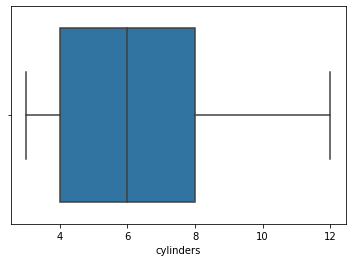

In [12]:
sns.boxplot(data['cylinders'])

Kolom `cylinders` memiliki nilai rata-rata **6.1** dan median **6**. Karena tipe data pada kolom ini merupakan `int64` maka kita akan menggunakan median sebagai pengganti nilai yang hilang.

In [13]:
data['cylinders'] = data['cylinders'].fillna(6)

#### Mengatasi nilai yang hilang pada kolom `model_year`

Dalam mengisi nilai yang hilang pada kolom ini diperlukan penulisan suatu fungsi sebagai berikut:

In [14]:
def fill_missing_median (dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

Menerapkan fungsi dengan memasukan nilai median `model_year` berdasarkan `model`, dan menggunakannya sebagai pengganti nilai yang hilang.

In [15]:
fill_missing_median (data, 'model', 'model_year')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


#### Mengatasi nilai yang hilang pada kolom `odometer`

In [16]:
data['odometer'].mean()

115553.4617376756

Untuk mengisi nilai yang hilang pada kolom ini akan digunakan fungsi yang sebeumnya teah dibuat, namun nilai yang hilang didapatkan dengan memasukan nilai median `odometer` berdasarkan `condition`.

In [17]:
fill_missing_median (data, 'condition', 'odometer')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


#### Memeriksa apakah masih ada nilai yang hilang 

In [18]:
data.isna().sum().sort_values()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

Dengan ini nilai yang hilang telah diperbaiki

### Memperbaiki Tipe Data <a id='data_type'></a>

Karena nilai yang hilang telah diperbaiki, maka tipe data yang belum sesuai dapat diperbaiki.

Mari perbaiki tipe datanya:

**Memperbaiki tipe data pada kolom `date_posted`**

In [19]:
data['date_posted'] = pd.to_datetime(data['date_posted'])

**Memperbaiki tipe data pada kolom `model_year`**

In [20]:
data['model_year'] = data['model_year'].astype('int')

**Memperbaiki tipe data pada kolom `cylinders`**

In [21]:
data['cylinders'] = data['cylinders'].astype('int')

**Memperbaiki tipe data pada kolom `is_4wd`**

In [22]:
data['is_4wd'] = data['is_4wd'].astype('bool')

**Memeriksa hasilnya**

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


In [24]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28


Dengan ini tipe data telah diperbaiki sebagaimana mestinya.

### Memperbaiki Kualitas Data <a id='data_quality'></a>

Selanjutnya memperbaiki kualitas data, untuk mempermudah proses analisis mari buat beberapa kolom tambahan sebagai berikut:

**Menambahkan nilai waktu dan tanggal pada saat iklan ditayangkan**

In [25]:
# Menambahkan nilai tahun pada saat iklan ditayangkan 
data['year_posted'] = data['date_posted'].dt.year

# Menambahkan nilai bulan pada saat iklan ditayangkan 
data['month_posted'] = data['date_posted'].dt.month

# Menambahkan nilai hari pada saat iklan ditayangkan 
data['day_posted'] = data['date_posted'].dt.day_name()

**Membuat kolom usia kendaraan**

In [26]:
# Menambahkan usia kendaraan saat iklan ditayangkan
data['car_age'] = data['year_posted'] - data['model_year']

In [91]:
data.year_posted.unique()

array([2018, 2019])

In [92]:
data.day_posted.unique()

array(['Saturday', 'Friday', 'Thursday', 'Tuesday', 'Wednesday', 'Monday',
       'Sunday'], dtype=object)

In [90]:
data.model_year.unique()

array([2011, 2013, 2003, 2017, 2014, 2015, 2012, 2008, 2018, 2009, 2010,
       2007, 2004, 2005, 2001, 2006, 1966, 1994, 2019, 2000, 2016, 1993,
       1999, 1997, 2002, 1981, 1995, 1996, 1975, 1998, 1985, 1977, 1987,
       1974, 1990, 1992, 1991, 1972, 1967, 1988, 1969, 1989, 1978, 1965,
       1979, 1968, 1986, 1980, 1964, 1963, 1984, 1982, 1973, 1970, 1955,
       1971, 1976, 1983, 1954, 1962, 1948, 1960, 1908, 1961, 1936, 1949,
       1958, 1929])

In [89]:
data.car_age.unique()

array([  7,   6,  16,   2,   4,   3,  11,   1,  10,   5,   8,   0,   9,
        15,  14,  13,  17,  12,  53,  24,  18,  19,  26,  22,  38,  20,
        23,  44,  21,  25,  33,  42,  31,  43,  29,  28,  46,  52,  49,
        30,  40,  54,  39,  50,  27,  32,  55,  37,  56,  34,  45,  41,
        51,  63,  47,  48,  36,  35,  65,  57,  71,  58,  59, 110,  82,
        69,  60,  89])

In [102]:
data.odometer_per_year.dtype

dtype('float64')

**Membuat kolom yang berisi jarak tempuh rata-rata kendaraan per tahun**

In [101]:
# Menambahkan jarak tempuh rata-rata kendaraan per tahun 
data['odometer_per_year'] = data['odometer'] / data['car_age']
data['odometer_per_year'] = data['odometer_per_year'].round(2)

**Membuat kolom `condition` baru yang dapat diolah dengan mudah**

Untuk mempermudah proses analisis, kolom `condition` perlu dibuatkan nilai pengganti yang berupa skala. Disini kita akan menggantinya dengan skala 0 hingga 5, dimana setiap angka secara berurutan mewakili `'salvage'`, `'fair'`, `'good'`, `'excellent'`, `'like new'`, dan `'new'`.

In [28]:
# Membuat fungsi yang akan merubah kolom `condition` menjadi skala angka 0-5

def condition_numeric(condition):
    if condition == 'new':
        return 5
    elif condition == 'like new':
        return 4
    elif condition == 'excellent':
        return 3
    elif condition == 'good':
        return 2
    elif condition == 'fair':
        return 1
    else: 
        return 0 

In [29]:
data['condition_numeric'] = data['condition'].apply(condition_numeric)

Kolom baru telah dibuat, dengan ini proses analisis menjadi lebih mudah.

### Memeriksa Data yang Sudah Bersih <a id='values_check_1'></a>

Data sudah siap dianalisis, namun sebelumnya mari kita lihat sekali lagi info datanya.

In [30]:
# Menampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   price              51525 non-null  int64         
 1   model_year         51525 non-null  int64         
 2   model              51525 non-null  object        
 3   condition          51525 non-null  object        
 4   cylinders          51525 non-null  int64         
 5   fuel               51525 non-null  object        
 6   odometer           51525 non-null  float64       
 7   transmission       51525 non-null  object        
 8   type               51525 non-null  object        
 9   paint_color        51525 non-null  object        
 10  is_4wd             51525 non-null  bool          
 11  date_posted        51525 non-null  datetime64[ns]
 12  days_listed        51525 non-null  int64         
 13  year_posted        51525 non-null  int64         
 14  month_

In [31]:
# Menampilkan sampel data 

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,month_posted,day_posted,car_age,odometer_per_year,condition_numeric
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,6,Saturday,7,20714.29,2
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,10,Friday,7,12672.14,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,2,Thursday,6,18333.33,4
3,1500,2003,ford f-150,fair,8,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,2019,3,Friday,16,11350.81,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,4,Tuesday,2,40451.50,3


## Tahap 2: Mempelajari Parameter Inti  <a id='parameter'></a>

Mari pelajari parameter inti sebelum melanjutkan analisis.

### Memeriksa Outlier <a id='outlier_1'></a>

Mari memulai proses analisa datanya, pertama kita akan memeriksa outlier beberapa parameter menggunakan *histogaram* dan *boxplot*, parameter yang akan diperiksa adalah:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

#### Mebuat histogram parameter `price`

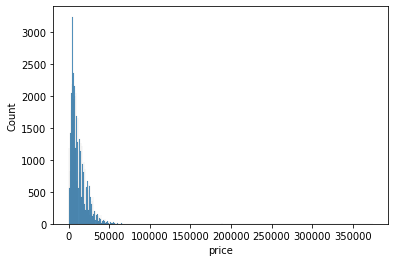

In [32]:
# Membuat histogram kolom `price`

sns.histplot(data['price']);

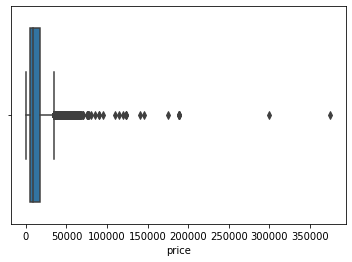

In [33]:
# Membuat boxplot kolom `price` untuk melihat outliernya

sns.boxplot(data['price']);

Kolom `price` terlihat memiliki outlier yang signifikan sehingga mempengaruhi bentuk histogramnya.

#### Mebuat histogram parameter `car_age`

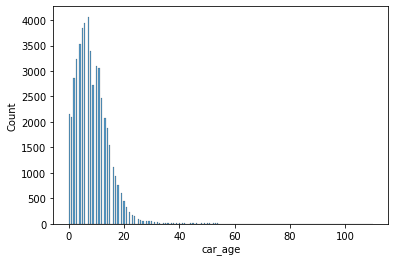

In [34]:
# Membuat histogram kolom `car_age`

sns.histplot(data['car_age']);

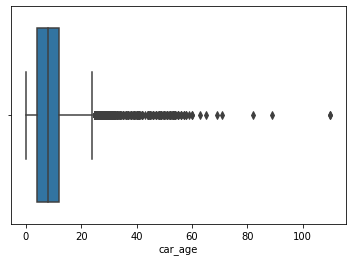

In [35]:
# Membuat boxplot kolom `car_age` untuk melihat outliernya

sns.boxplot(data['car_age']);

Setelah diperhatikan ternyata kolom `age_car` juga memiliki outlier yang signifikan.

#### Mebuat histogram parameter `odometer`

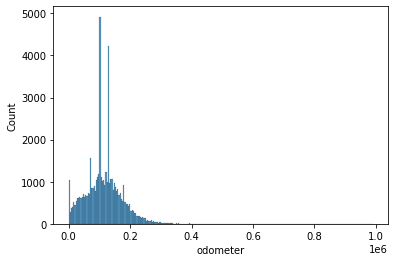

In [36]:
# Membuat histogram kolom `odometer`

sns.histplot(data['odometer']);

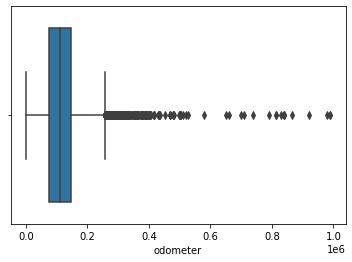

In [37]:
# Membuat boxplot kolom `odometer` untuk melihat outliernya

sns.boxplot(data['odometer']);

Outier yang signifikan juga beraku pada kolom `odometer`. Selain itu jika diperhatikan terjadi beberapa lonjakan data, hal ini mungkin disebakan oleh nilai pengganti dari nilai yang hilang.

#### Mebuat histogram parameter `cylinders`

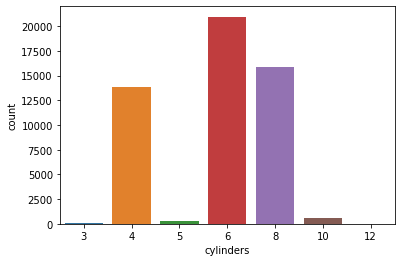

In [38]:
# Membuat histogram kolom `cylinders`

sns.countplot(data['cylinders']);

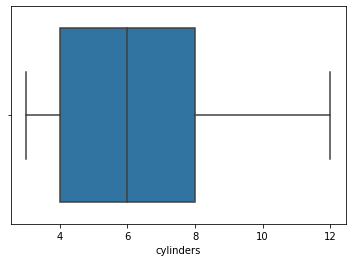

In [39]:
# Membuat boxplot kolom `cylinders` untuk melihat outliernya

sns.boxplot(data['cylinders']);

Sepertinya parameter `cylinders` tidak memiliki outlier.

#### Mebuat histogram parameter `condition_numeric`

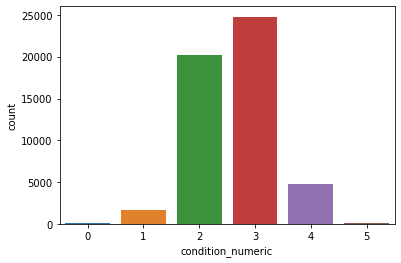

In [40]:
# Membuat histogram kolom `condition_numeric`

sns.countplot(data['condition_numeric']);

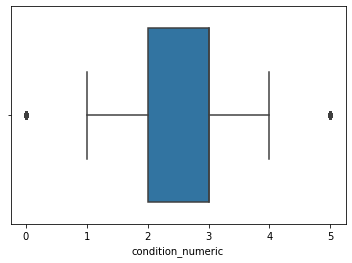

In [41]:
# Membuat boxplot kolom `condition_numeric` untuk melihat outliernya

sns.boxplot(data['condition_numeric']);

Terdapat outlier pada parameter `condition_numeric`

### Mempelajari dan Menangani Outlier <a id='outlier_2'></a>

Dari semua yang telah kita periksa, hanya jumlah silinder yang tidak memiliki outlier. Untuk memproses outlier kita perlu mengetahui batas atas dan batas bawah masing-masing parameter. Kemudian kita akan membuat *dataframe* baru yang berisikan *dataset* yang telah difilter.

Pertama-tama mari kita cari tahu batas atas dan batas bawah parameter berikut:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh 
- Kondisi

In [42]:
# Menentukan batas atas dan batas bawah outlier dari parameter `price`

Q1_Price = data['price'].quantile(0.25)
Q3_Price = data['price'].quantile(0.75)
IQR_price = Q3_Price - Q1_Price
lower_whisker_price = Q1_Price - (1.5 * IQR_price)
upper_whisker_price = Q3_Price + (1.5 * IQR_price)

print('Upper Whisker Price:', upper_whisker_price)
print('Lower Whisker Price:', lower_whisker_price)

Upper Whisker Price: 34597.5
Lower Whisker Price: -12758.5


In [43]:
# Menentukan batas atas dan batas bawah outlier dari parameter `car_age`

Q1_Price = data['car_age'].quantile(0.25)
Q3_Price = data['car_age'].quantile(0.75)
IQR_price = Q3_Price - Q1_Price
lower_whisker_age = Q1_Price - (1.5 * IQR_price)
upper_whisker_age = Q3_Price + (1.5 * IQR_price)

print('Upper Whisker Age:', upper_whisker_age)
print('Lower Whisker Age:', lower_whisker_age)

Upper Whisker Age: 24.0
Lower Whisker Age: -8.0


In [44]:
# Menentukan batas atas dan batas bawah outlier dari parameter `odometer`

Q1_Price = data['odometer'].quantile(0.25)
Q3_Price = data['odometer'].quantile(0.75)
IQR_price = Q3_Price - Q1_Price
lower_whisker_odometer = Q1_Price - (1.5 * IQR_price)
upper_whisker_odometer = Q3_Price + (1.5 * IQR_price)

print('Upper Whisker Odometer:', upper_whisker_odometer)
print('Lower Whisker Odometer:', lower_whisker_odometer)

Upper Whisker Odometer: 256050.5
Lower Whisker Odometer: -32561.5


In [45]:
# Menentukan batas atas dan batas bawah outlier dari parameter `condition_numeric`

Q1_Price = data['condition_numeric'].quantile(0.25)
Q3_Price = data['condition_numeric'].quantile(0.75)
IQR_price = Q3_Price - Q1_Price
lower_whisker_condition = Q1_Price - (1.5 * IQR_price)
upper_whisker_condition = Q3_Price + (1.5 * IQR_price)

print('Upper Whisker Condition:', upper_whisker_condition)
print('Lower Whisker Condition:', lower_whisker_condition)

Upper Whisker Condition: 4.5
Lower Whisker Condition: 0.5


Batas atas dan batas bawah setiap parameter telah dibuat, selanjutnya *dataframe* akan difilter menggunakan batas atas dan batas bawah yang telah ditentukan.

In [46]:
# Menyimpan data tanpa outlier dalam DataFrame yang terpisah

data_filtered = data[(data['price'] > lower_whisker_price) & (data['price'] < upper_whisker_price)]
data_filtered = data_filtered[(data_filtered['car_age'] > lower_whisker_age) & (data_filtered['car_age'] < upper_whisker_age)]
data_filtered = data_filtered[(data_filtered['odometer'] > lower_whisker_odometer) & (data_filtered['odometer'] < upper_whisker_odometer)]
data_filtered = data_filtered[(data_filtered['condition_numeric'] > lower_whisker_condition) & (data_filtered['condition_numeric'] < upper_whisker_condition)]

### Mempelajari Parameter Inti Tanpa Outlier <a id='outlier_3'></a>

*Dataframe* yang telah difilter sudah dibuat, mari pelajari dan bandingkan dengan *dataframe* lama yang belum difilter.

#### Membandingkan dataframe dengan dan tanpa outlier

Dataframe yang belum difilter:

In [47]:
data.shape

(51525, 19)

In [48]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,car_age,odometer_per_year,condition_numeric
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51523.000,51525.000000
mean,12132.464920,2009.793557,6.112450,115199.014508,39.55476,2018.307462,6.628491,8.513906,inf,2.637535
std,10040.803015,6.099381,1.573784,60484.863376,28.20427,0.461447,3.474134,6.112976,NaN,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.00000,2018.000000,1.000000,0.000000,0.000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,19.00000,2018.000000,3.000000,4.000000,10585.770,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,33.00000,2018.000000,7.000000,8.000000,15272.730,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,53.00000,2019.000000,10.000000,12.000000,22858.195,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,2019.000000,12.000000,110.000000,inf,5.000000


Dataframe yang telah difilter:

In [49]:
data_filtered.shape

(47953, 19)

In [50]:
data_filtered.describe()

,price,model_year,cylinders,odometer,days_listed,year_posted,month_posted,car_age,odometer_per_year,condition_numeric
count,47953.000000,47953.000000,47953.000000,47953.000000,47953.000000,47953.000000,47953.000000,47953.000000,47952.000,47953.000000
mean,11264.994912,2010.128897,6.051926,113710.629220,39.543178,2018.306383,6.635539,8.177486,inf,2.638646
std,7824.084262,4.961132,1.572799,52967.604835,28.224074,0.460996,3.472632,4.974167,NaN,0.680268
min,1.000000,1995.000000,3.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.000,1.000000
25%,5000.000000,2007.000000,4.000000,78840.000000,19.000000,2018.000000,3.000000,4.000000,10683.120,2.000000
50%,8995.000000,2011.000000,6.000000,111880.000000,33.000000,2018.000000,7.000000,7.000000,15131.355,3.000000
75%,15995.000000,2014.000000,8.000000,146000.000000,53.000000,2019.000000,10.000000,11.000000,22258.250,3.000000
max,34595.000000,2019.000000,12.000000,256000.000000,271.000000,2019.000000,12.000000,23.000000,inf,4.000000


Terdapat perbedaan nilai rata-rata dan median, hal ini tentunya dikarenakan data telah berkurang sebanyak 3572 data setelah difilter sehingga menggeser nilai rata-rata maupun mediannya.

#### Membandingkan histogram parameter `price`

Memeriksa outliernya menggunakan *boxplot* 

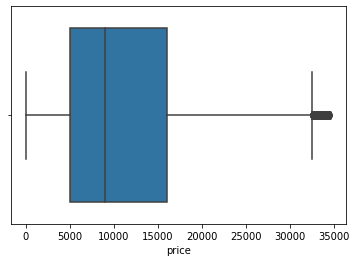

In [51]:
# Melihat boxplot dari dataframe yang telah difilter

sns.boxplot(data_filtered['price']);

*Dataframe* yang telah difilter masih tedapat sedikit outlier, walaupun demikian outlier yang ada bukan merupakan nilai yang ekstrem sehingga kita dapat mengabaikannya.

*Dataframe* yang belum difilter:

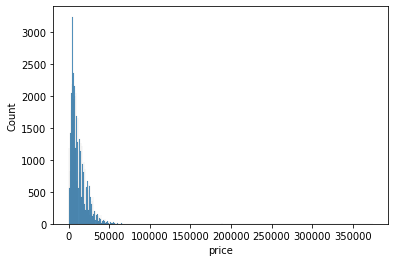

In [52]:
sns.histplot(data['price']);

*Dataframe* yang telah difilter:

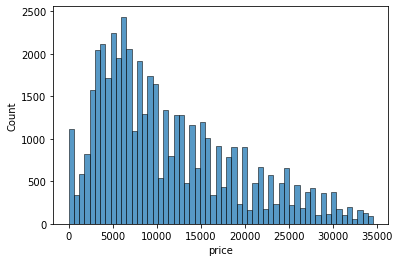

In [53]:
sns.histplot(data_filtered['price']);

Sekarang histogramnya jadi dapat lebih mudah dibaca, mari periksa parameter selanjutnya.

#### Membandingkan histogram parameter `car_age` 

Memeriksa outliernya menggunakan *boxplot* 

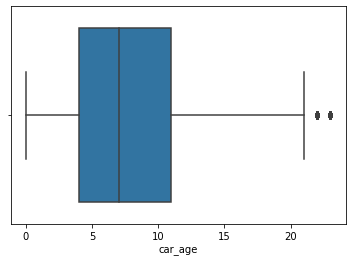

In [54]:
# Melihat boxplot dari dataframe yang telah difilter

sns.boxplot(data_filtered['car_age']);

Parameter `car_age` juga masih tedapat sedikit outlier, namun kita juga dapat mengabaikannya.

*Dataframe* yang belum difilter:

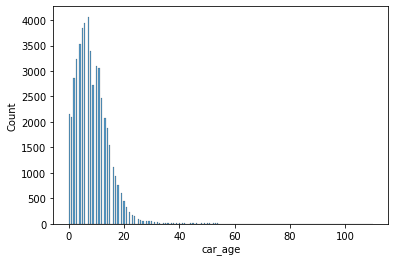

In [55]:
sns.histplot(data['car_age']);

*Dataframe* yang telah difilter:

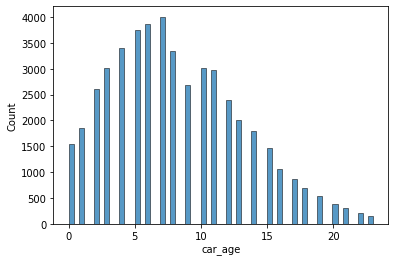

In [56]:
sns.histplot(data_filtered['car_age']);

Histogramnya terlihat jauh lebih baik.

#### Membandingkan histogram parameter `odometer`

Memeriksa outliernya menggunakan boxplot.

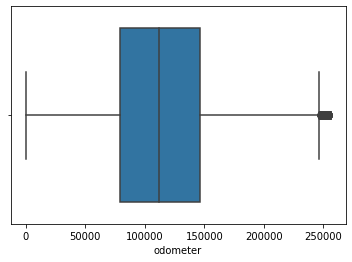

In [57]:
# Melihat boxplot dari dataframe yang telah difilter

sns.boxplot(data_filtered['odometer']);

Parameter ini juga masih tedapat sedikit outlier, dan kita tetap dapat mengabaikannya.

*Dataframe* yang belum difilter:

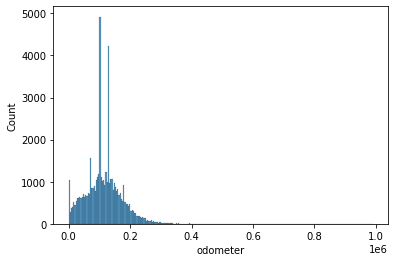

In [58]:
sns.histplot(data['odometer']);

*Dataframe* yang telah difilter:

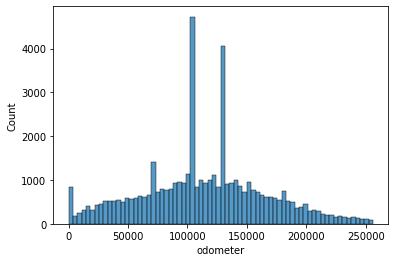

In [59]:
sns.histplot(data_filtered['odometer']);

Histogramnya sudah lebih mudah dipahami, nilai amun tetap ada lonjakan data yang signifikan di beberapa titik yang disebabkan oleh nilai pengganti dari nilai yang hilang.

#### Membandingkan histogram parameter `condition_numeric`

Memeriksa outliernya menggunakan boxplot.

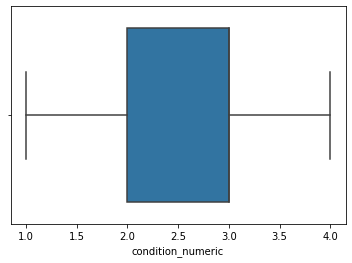

In [60]:
# Melihat boxplot dari dataframe yang telah difilter

sns.boxplot(data_filtered['condition_numeric']);

Outliernya telah benar-benar hilang.

Dataframe yang belum difilter:

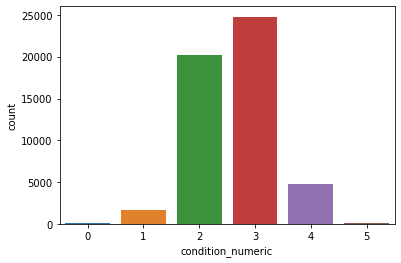

In [61]:
sns.countplot(data['condition_numeric']);

Dataframe yang telah difilter:

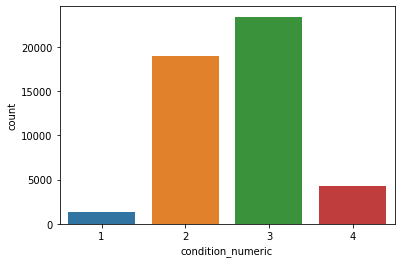

In [62]:
sns.countplot(data_filtered['condition_numeric']);

Nilai 0 dan 5 merupakan outlier sehingga data dengan nilai tersebut tidak masuk ke dalam *dataframe* yang telah difilter.

## Tahap 3: Masa Berlaku Iklan <a id='ads'></a>

Selanjutnya mari pelajari berapa hal berikut:
1. Berapa hari rata-rata sebuah iklan ditayangkan?
2. Berapa nilai mediannya?
3. Berapa lama waktu tercepat suatu iklan dihapus?
4. Berapa lama waktu terlama suatu iklan ditayangkan?

In [63]:
data_filtered['days_listed'].describe()

count    47953.000000
mean        39.543178
std         28.224074
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

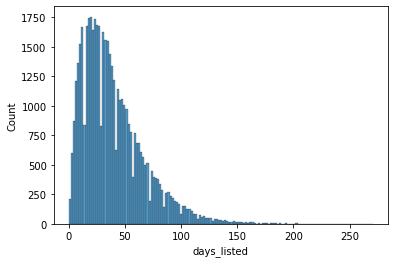

In [64]:
sns.histplot(data_filtered['days_listed']);

Dari data di atas dapat ditarik suatu kesimpulan sebagai berikut:
1. Umumnya iklan ditayangkan rata-rata dalam waktu 39 hari.
2. Median usia sebuah iklan adalah 33 hari.
3. Waktu tercepat iklan dihapus adalah kurang dari satu hari.
4. Waktu terlama iklan ditayangkan adalah 271 hari.

## Tahap 4: Harga Rata-Rata Setiap Jenis Kendaraan <a id='mean_type'></a>

Setelah mengetahui usia suatu iklan, selanjutnya mari mencari tahu jumlah iklan dan harga rata-rata setiap jenis kendaraan:

In [65]:
type_price_mean = data_filtered.pivot_table(index='type', values='price', aggfunc=['mean', 'count']).round(2)
type_price_mean.columns = ['avg_price', 'car_count']
type_price_mean = type_price_mean.sort_values(by='car_count', ascending=False)

type_price_mean

,avg_price,car_count
type,,
sedan,6982.47,11911
SUV,10480.45,11830
truck,15194.30,11012
pickup,15137.59,6220
coupe,13553.12,1998
wagon,9012.83,1497
mini-van,8057.88,1138
hatchback,6851.25,996
van,8887.90,577


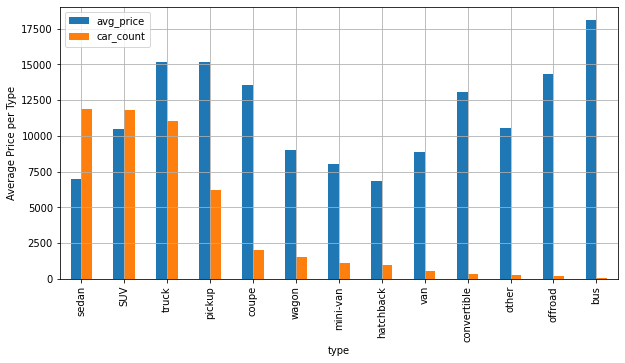

In [66]:
type_price_mean.plot(kind='bar', grid=True, figsize=(10,5))
plt.ylabel('Average Price per Type')
plt.show()

Kendaraan dengan tipe `'sedan'` memiliki rata-rata terendah kedua setelah `'hatchback'` memiliki jumlah iklan terbanyak, sedangkan kendaraan dengan tipe `'bus'` memiliki rata-rata yang paling tinggi namun jumlah iklannya hanya sedikit. Sepertinya rata-rata harga tidak mempengaruhi jumah iklan yang ditayangkan, hal ini terbukti dengan rata-rata harga `'sedan'` dan `'hatchback'` yang hampir sama namun jumlah iklannya sangat berbanding terbalik.

Berdasarkan jumlah iklannya, `'sedan'` dan `'SUV'` menjadi tipe kendaraan yang paling populer.

## Tahap 5: Faktor Harga <a id='price'></a>

Apakah faktor yang paling memengaruhi harga kendaraan?

Untuk menjawabnya, kita akan mengambi data dari dua jenis kendaraan palin populer teratas yaitu `'sedan'` dan `'SUV'`. Kita akan mencari tahu apakah harganya bergantung pada usia, jarak tempuh, kondisi, tipe transmisi, dan warnanya.

### Kendaraan Tipe Sedan <a id='sedan'></a>

Memeriksa faktor yang mempengaruhi harga kendaraan dengan tipe `'sedan'`

In [67]:
# Memfilter data berdasarkan salah satu tipe kendaraan yang paling popoler yaitu `'sedan'`

data_sedan = data_filtered[data_filtered['type'] == 'sedan'].reset_index(drop=True)

In [68]:
# Memeriksa korelasi yang mempengaruhi harga pada kendaraan dengan tipe `'sedan'`

data_sedan.corr()['price']

price                1.000000
model_year           0.619351
cylinders           -0.040880
odometer            -0.519473
is_4wd               0.041413
days_listed          0.002520
year_posted          0.016207
month_posted        -0.020160
car_age             -0.615821
odometer_per_year    0.312959
condition_numeric    0.288429
Name: price, dtype: float64

Berdasarkan data diatas dapat ditarik kesimpulan sebagai berikut:
- Jarak tempuh `odometer` memiliki nilai korelasi -0.519473, artinya terdapat korelasi negatif yang tidak terlalu kuat dimana semakin tinggi jarak tempuh suatu kendaraan, maka harganya akan semakin rendah.
- Usia kendaraan `car_age` memiliki korelasi sebesar -0.615821, artinya terdapat korelasi negatif yang cukup kuat dimana semakin tua suatu kendaraan maka semakin rendah harganya.
- Kondisi Kendaraan `condition_numeric` memiliki korelasi 0.288429, artinya terdapat korelasi namun sangat lemah dimana semakin baik kondisinya maka akan semakin tinggi harganya.

#### Faktor <u>Harga</u> Terhadap <u>Jarak Tempuh</u>

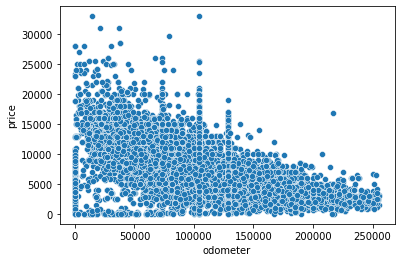

In [69]:
sns.scatterplot(data=data_sedan, y='price', x='odometer');

Dapat dilihat semakin sedikit jarak tempuh suatu kendaraan, maka semakin tinggi harganya.

#### Faktor  <u>Harga</u> Terhadap <u>Usia Kendaraan</u>

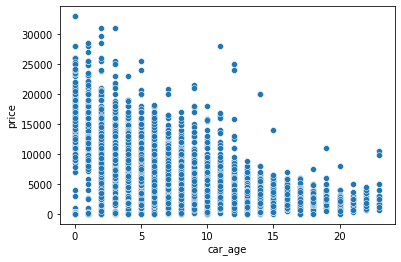

In [70]:
sns.scatterplot(data=data_sedan, y='price', x='car_age');

Hal ini berlaku juga kepada usia kendaraan, yaitu dimana semakin muda suatu kendaraan maka semakin tinggi pula harganya.

#### Faktor <u>Harga</u> Terhadap <u>Kondisi Kendaraan</u>

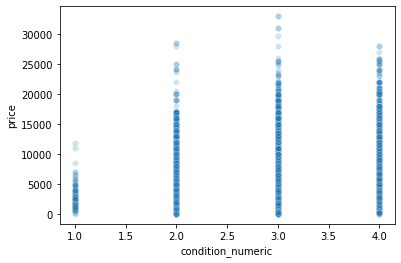

In [71]:
sns.scatterplot(data=data_sedan, y='price', x='condition_numeric', alpha=0.2);

Sepertinya harga dan kondisi kendaraan memiliki korelasi yang sangat lemah dimana kendaraan dengan skala kondisi 1 atau `'fair'` dihargai lebih rendah dari kondisi lainnya. Dan pada skala kondisi 2-4 walaupun semakin tinggi nilai kondisi suatu kendaraan maka cenderung makin tinggi pula harganya, namun hal tersebut tidaklah bersifat pasti karena dapat dilihat bahwa beberapa kendaraan dengan nilai kondisi 3 memiliki harga yang lebih tinggi daripada kendaraan dengan nilai kondisi 4.

#### Faktor <u>Harga</u> Terhadap <u>Tipe Transmisi</u>

Karena `transmission` merupakan variabel kategorik, maka kita perlu menganalisisnya menggunakan *boxplot*. Namun untuk menganalisanya kita harus memastikan bahwa datanya memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

In [72]:
# Memastikan apakah `transmission` memiliki jumlah iklan kurang dari 50

data_sedan['transmission'].value_counts()

automatic    11209
manual         571
other          131
Name: transmission, dtype: int64

Semua data telah memenuhi syarat minimum dimana datanya lebih dari 50.

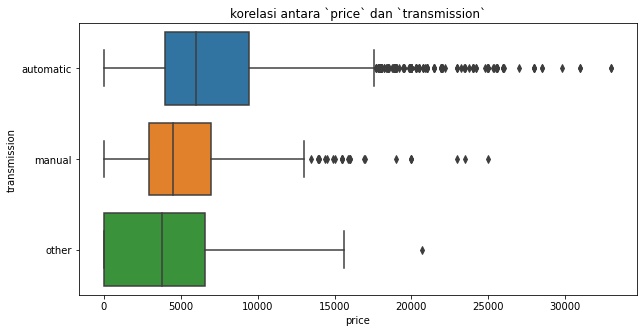

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_sedan, x='price', y='transmission');
plt.title('korelasi antara `price` dan `transmission`');

Sepertinya kendaraan dengan tipe transmisi `'automatic'` dihargai lebih tinggi.

#### Faktor <u>Harga</u> Terhadap <u>Warna Kendaraan</u>

Kolom `paint_color` juga merupakan variabel kategorik, maka kita juga perlu menganalisisnya menggunakan *boxplot*. Dan sama seperti sebelumnya, untuk menganalisanya kita harus memastikan bahwa datanya memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

**Memeriksa matriks <u>harga</u> terhadap <u>warna kendaraan</u>**

In [74]:
# Memastikan apakah `paint_color` memiliki jumlah iklan kurang dari 50

data_sedan['paint_color'].value_counts()

unknown    2142
silver     2018
black      1747
grey       1600
white      1471
blue       1212
red         926
custom      291
brown       250
green       201
purple       23
yellow       21
orange        9
Name: paint_color, dtype: int64

Ternyata jumlah kendaraan dengan warna `'purple'`, `'yellow'`, dan `'orange'` kurang dari 50, sehingga warna tersebut perlu dihilangkan.

In [75]:
# Membuat list yang berisikan 'paint_color' > 50

sedan_color_list = list(data_sedan['paint_color'].value_counts()[:-3].index)

In [76]:
# Memfilter kembali dataframe dengan list yang telah dibuat sebelumnya

data_sedan_color = data_sedan[data_sedan['paint_color'].isin(sedan_color_list)]

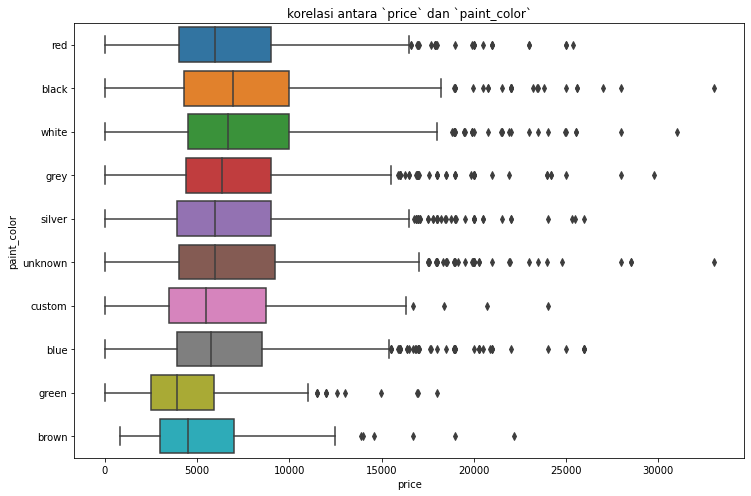

In [77]:
# Membuat boxplot

plt.figure(figsize=(12,8))
sns.boxplot(data=data_sedan_color, x='price', y='paint_color');
plt.title('korelasi antara `price` dan `paint_color`');

Warna `'green'` menjadi kendaraan tipe `sedan` dengan harga paling rendah, dan `'black'` menjadi kendaraan tipe `sedan` dengan harga paling tinggi.

### Kendaraan Tipe SUV <a id='suv'></a>

Memeriksa faktor yang mempengaruhi harga kendaraan dengan tipe `'SUV'`

In [78]:
# Memfilter data berdasarkan salah satu tipe kendaraan yang paling popoler yaitu `'SUV'`

data_suv = data_filtered[data_filtered['type'] == 'SUV'].reset_index(drop=True)

In [79]:
# Memeriksa korelasi yang mempengaruhi harga pada kendaraan dengan tipe `'SUV'`

data_suv.corr()['price']

price                1.000000
model_year           0.575027
cylinders           -0.006650
odometer            -0.484526
is_4wd               0.114889
days_listed         -0.020565
year_posted          0.000506
month_posted        -0.007101
car_age             -0.573008
odometer_per_year    0.282387
condition_numeric    0.256909
Name: price, dtype: float64

Berdasarkan data diatas dapat ditarik kesimpulan sebagai berikut:
- Jarak tempuh `odometer` memiliki nilai korelasi -0.484526, artinya terdapat korelasi negatif yang tidak terlalu kuat dimana semakin tinggi jarak tempuh suatu kendaraan, maka harganya akan semakin rendah.
- Usia kendaraan `car_age` memiliki korelasi sebesar -0.573008, artinya terdapat korelasi negatif yang tidak terlalu kuat dimana semakin tua suatu kendaraan maka semakin rendah harganya.
- Kondisi Kendaraan `condition_numeric` memiliki korelasi 0.256909, artinya terdapat korelasi namun sangat lemah dimana semakin baik kondisinya maka akan semakin tinggi harganya.

#### Faktor <u>Harga</u> Terhadap <u>Jarak Tempuh</u>

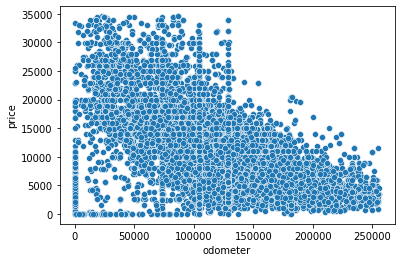

In [80]:
sns.scatterplot(data=data_suv, y='price', x='odometer');

Dapat dilihat semakin sedikit jarak tempuh suatu kendaraan jenis `SUV`, maka semakin tinggi harganya.

#### Faktor <u>Harga</u> Terhadap <u>Usia Kendaraan</u>

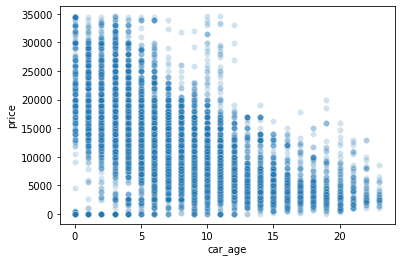

In [81]:
sns.scatterplot(data=data_suv, y='price', x='car_age', alpha=0.2);

Hal ini berlaku juga kepada usia kendaraan, yaitu dimana semakin muda suatu kendaraan maka semakin tinggi pula harganya.

#### Faktor <u>Harga</u> Terhadap <u>Kondisi Kendaraan</u>

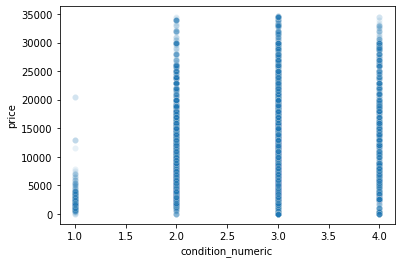

In [82]:
sns.scatterplot(data=data_suv, y='price', x='condition_numeric', alpha=0.1);

Harga dan kondisi kendaraan memiliki korelasi yang sangat lemah dimana kendaraan dengan skala kondisi 1 atau `'fair'` dihargai lebih rendah dari kondisi lainnya. Dan pada skala kondisi 2-4 memiliki harga yang cenderung sama tingginya.

#### Faktor <u>Harga</u> Terhadap <u>Jenis Transmisi</u>

Karena `transmission` merupakan variabel kategorik, maka kita perlu menganalisisnya menggunakan *boxplot*. Namun untuk menganalisanya kita harus memastikan bahwa datanya memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

In [83]:
data_suv['transmission'].value_counts()

automatic    11217
manual         455
other          158
Name: transmission, dtype: int64

Semua data telah memenuhi syarat minimum dimana datanya lebih dari 50.

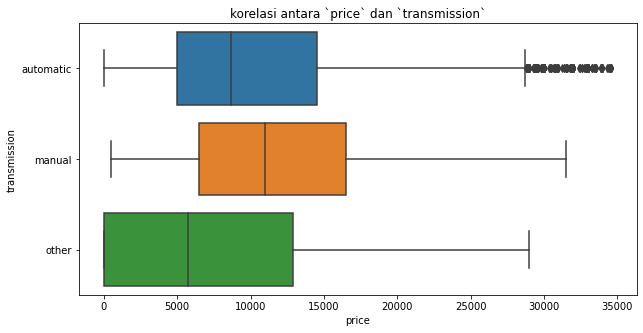

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data_suv, x='price', y='transmission');
plt.title('korelasi antara `price` dan `transmission`');

Berbeda dengan kendaraan dengan tipe `'sedan'`, `'SUV'` dengan jenis transmisi `'manual'` memiliki median harga paling tinggi. Meski demikian, kendaraan dengan jenis transmisi `'automatic'` memiliki outlier yang jauh lebih tinggi.

#### Faktor <u>Harga</u> Terhadap <u>Warna Kendaraan</u>

Kolom `paint_color` juga merupakan variabel kategorik, maka kita juga perlu menganalisisnya menggunakan *boxplot*. Dan sama seperti sebelumnya, untuk menganalisanya kita harus memastikan bahwa datanya memiliki setidaknya 50 iklan. Jika tidak, parameternya tidak akan valid untuk digunakan saat analisis.

In [85]:
data_suv['paint_color'].value_counts()

unknown    2131
black      2080
white      1862
silver     1527
grey       1143
blue       1007
red         865
green       406
brown       350
custom      295
orange       81
yellow       45
purple       38
Name: paint_color, dtype: int64

Ternyata jumlah kendaraan dengan warna `'purple'` dan `'yellow'` memiliki jumlah iklan kurang dari 50, sehingga warna tersebut perlu dihilangkan.

In [86]:
# Membuat list yang berisikan 'paint_color' > 50

suv_color_list = list(data_suv['paint_color'].value_counts()[:-2].index)

In [87]:
# Memfilter kembali dataframe dengan list yang telah dibuat sebelumnya

data_suv_color = data_suv[data_suv['paint_color'].isin(suv_color_list)]

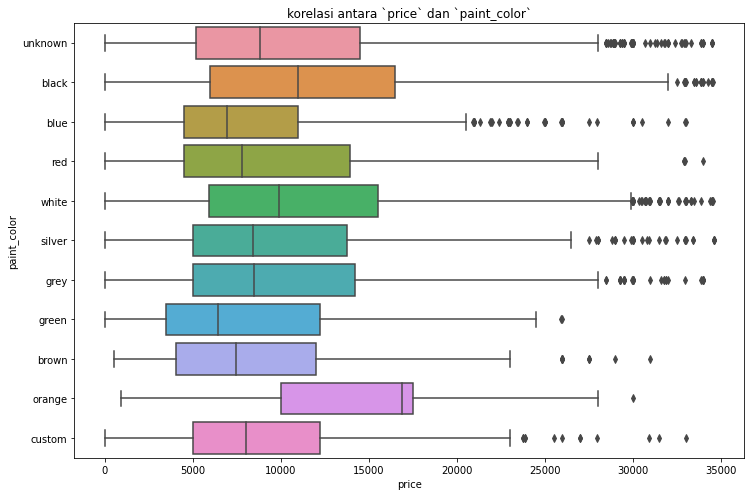

In [88]:
# Membuat boxplot

plt.figure(figsize=(12,8))
sns.boxplot(data=data_suv_color, x='price', y='paint_color');
plt.title('korelasi antara `price` dan `paint_color`');

Warna `'orange'` memiliki median harga paling tinggi diantara warna lainnya, namun warna `'black'` memiliki batas atas yang paling tinggi. Selain itu beberapa warna seperti `'white'`, `'silver'`, dan `'unknown'` memiliki outlier yang sama tingginya dengan `'black'`.

## Kesimpulan Umum <a id='end'></a>

Dalam Pra-pemrosesan data telah ditemukan beberapa masalah seperti terdapat nilai yang hilang, kolom dengan tipe data yang tidak sesuai, serta terdapat nilai yang mencurigakan yang mungkin akan mempengaruhi outlier. Meski tidak ditemukan adanya data yang terduplikasi, namun tampaknya nilai yang hilang menjadi masalah yang cukup serius dimana kolom `is_4wd` memiliki presentase nilai yang hilang paling parah yaitu hingga 50.4%, disusul kolom `paint_color` dengan presentase nilai yang hilang sebanyak 18%, kolom `odometer` sebesar 15.3%, kolom `cylinders` 10.2%, dan diurutan terakhir adalah kolom `model_year` dengan presentase 7%.

Setelah menentukan nilai yang tepat, semua nilai yang hilangpun telah berhasil diatasi. Kemudian tipe data yang tidak sesuai juga telah diperbaiki. Selanjutnya untuk mempermudah proses analisis, diputuskan untuk membuat beberapa kolom tambahan seperti `year_posted`, `month_posted`, dan `day_posted` yang berisikan nilai waktu dan tanggal pada saat iklan ditayangkan, menambahkan kolom `car_age` yang berisikan informasi usia kendaraan, dan `odometer_per_year` yang berisikan jarak tempuh rata-rata kendaraan per tahun. Selain itu telah dibuatkan juga skala numerik yang mewakili kolom `condition` dan disimpan dalam kolom `condition_numeric`.

Data yang telah ditransformasi ternyata memiliki outlier yang cukup signifikan, karena itu perlu dibuat dataset baru yang telah difilter tanpa outlier. Maka ditentukanlah batas atas dan batas bawah setiap parameter.

Dengan menggunakan *dataframe* yang baru, kita mempelajari tiga hal berikut:
1. Usia suatu iklan ditayangkan.
2. Harga rata-rata setiap jenis kendaraan.
3. Faktor yang mempengaruhi harga suatu kendaraan.

Setelah menganalisis datanya, dapat disimpulkan bahwa:
1. Usia suatu iklan ditayangkan:
   - Umumnya iklan ditayangkan rata-rata dalam waktu 39 hari.
   - Median usia sebuah iklan adalah 33 hari.
   - Waktu tercepat iklan dihapus adalah kurang dari satu hari.
   - Waktu terlama iklan ditayangkan adalah 271 hari.
   
   
2. Dua jenis kendaraan teratas yang paling populer adalah `'sedan'` dan `'SUV'`. Dengan harga rata-rata secara berturut-turut `6982.47` dan `10480.45`.


3. Berdasarkan dua jenis kendaraan teratas yang paling populer:

   a. Kendaraan dengan jenis `'sedan'`:
      - Jarak tempuh `odometer` memiliki nilai korelasi -0.519473, artinya terdapat korelasi negatif yang tidak terlalu kuat dimana semakin tinggi jarak tempuh suatu kendaraan, maka harganya akan semakin rendah.
      - Usia kendaraan `car_age` memiliki korelasi sebesar -0.615821, artinya terdapat korelasi negatif yang cukup kuat dimana semakin tua suatu kendaraan maka semakin rendah harganya.
      - Kondisi Kendaraan `condition_numeric` memiliki korelasi 0.288429, artinya terdapat korelasi namun sangat lemah. Dimana kendaraan dengan skala kondisi 1 atau `'fair'` dihargai lebih rendah dari kondisi lainnya. Dan pada skala kondisi 2-4 walaupun semakin tinggi nilai kondisi suatu kendaraan maka cenderung makin tinggi pula harganya, namun hal tersebut tidaklah bersifat pasti karena dapat dilihat bahwa beberapa kendaraan dengan nilai kondisi 3 memiliki harga yang lebih tinggi daripada kendaraan dengan nilai kondisi 4.
      - Kendaraan jenis `'sedan'` dengan tipe transmisi `'automatic'` dihargai lebih tinggi.
      - Warna `'green'` menjadi kendaraan tipe `sedan` dengan harga paling rendah, dan `'black'` menjadi kendaraan tipe `sedan` dengan harga paling tinggi.   
      
   b. Kendaraan dengan jenis `'sedan'`:
      - Jarak tempuh `odometer` memiliki nilai korelasi -0.484526, artinya terdapat korelasi negatif yang tidak terlalu kuat dimana semakin tinggi jarak tempuh suatu kendaraan, maka harganya akan semakin rendah.
      - Usia kendaraan `car_age` memiliki korelasi sebesar -0.573008, artinya terdapat korelasi negatif yang tidak terlalu kuat dimana semakin tua suatu kendaraan maka semakin rendah harganya.
      - Kondisi Kendaraan `condition_numeric` memiliki korelasi 0.256909, artinya terdapat korelasi namun sangat lemah. Dimana kendaraan dengan skala kondisi 1 atau `'fair'` dihargai lebih rendah dari kondisi lainnya. Dan pada skala kondisi 2-4 memiliki harga yang cenderung sama tingginya.
      - Berbeda dengan kendaraan dengan tipe `'sedan'`, `'SUV'` dengan jenis transmisi `'manual'` memiliki median harga paling tinggi. Meski demikian, kendaraan dengan jenis transmisi `'automatic'` memiliki outlier yang jauh lebih tinggi.
      - Warna `'orange'` memiliki median harga paling tinggi diantara warna lainnya, namun warna `'black'` memiliki batas atas yang paling tinggi. Selain itu beberapa warna seperti `'white'`, `'silver'`, dan `'unknown'` memiliki outlier yang sama tingginya dengan `'black'`.
      
   c. Kesimpulan dari keduanya:
      - Jarak tempuh `odometer` dan usia kendaraan `car_age` memiliki korelasi yang cukup kuat dimana semakin tinggi jarak tempuh ataupun usia suatu kendaraan, maka harganya akan semakin rendah.
      - Kondisi Kendaraan `condition_numeric`memiliki korelasi yang lemah. Dimana kendaraan dengan skala kondisi 1 atau `'fair'` dihargai lebih rendah dari kondisi lainnya. Namun pada skala kondisi 2-4 memiliki harga yang cenderung tidak pasti.
      - Warna `'black'` menjadi kendaraan dengan harga paling tinggi di kedua jenis kendaraan `'sedan'` dan `'SUV'`. Namun belum bisa dipastikan apakah warna kendaraan memiliki keterkaitan dengan harga kendaraan, karena hanya 2 jenis kendaraan teratas yang sudah dianalisa.